In [1]:
import warnings
import datetime
import itertools
import numpy as np
import scipy as sp
import cvxpy as cp
import pandas as pd
import yfinance as yf
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from functools import reduce
from kit import interval_dict, annualize_returns, annualize_vol, get_yf_ts, get_usd_mcap, gbm

warnings.filterwarnings('ignore')

This notebook examines data for stock market indices for different markets (developed and emerging economies) their performance in the last 5 years and their constituents (where possible with data).

🇪🇺 <b>STOXX 50</b> is a stock index of companies in Eurozone countries. It is a market weighted index of the 50 stocks from 11 countries, representing some of the largest companies in Europe. The index itself as well as its derivatives (index futures and options) are among some of the most liquid products in Europe and the world. It's <b>price in euros</b> below:

[]

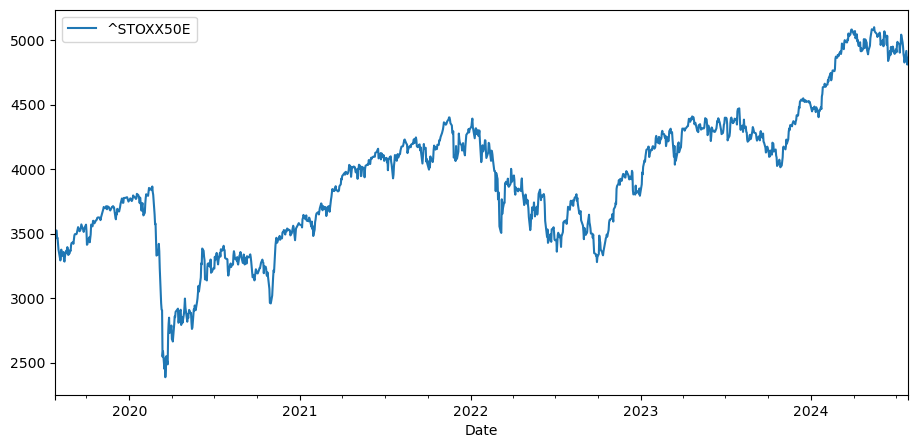

In [31]:
get_yf_ts('^STOXX50E', '5y', '1d').plot(figsize=(11,5))
plt.plot()

Short of data from Yahoo Finance, I am scraping the wikipedia page for its constituents, link for reference below:

In [49]:
stoxx50 = pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]

In [51]:
stoxx50['MARKET_CAP_USD'] = stoxx50['Ticker'].apply(get_usd_mcap)
stoxx50['WEIGHT'] = stoxx50['MARKET_CAP_USD'] / stoxx50['MARKET_CAP_USD'].sum()

In [127]:
print("STOXX50 approximate market cap: EUR " + "{:,}".format(stoxx50['MARKET_CAP_USD'].sum() * get_yf_ts('EUR=X', '1d', '1d').iloc[0][0]))

STOXX50 approximate market cap: EUR 4,351,870,981,665.0


Below we observe the 15 largest constituents of STOXX50 as of today. Note, Yahoo Finance gives the total market cap and has no option for free floating cap (only public investor shares), so there might be some error in the ordering.

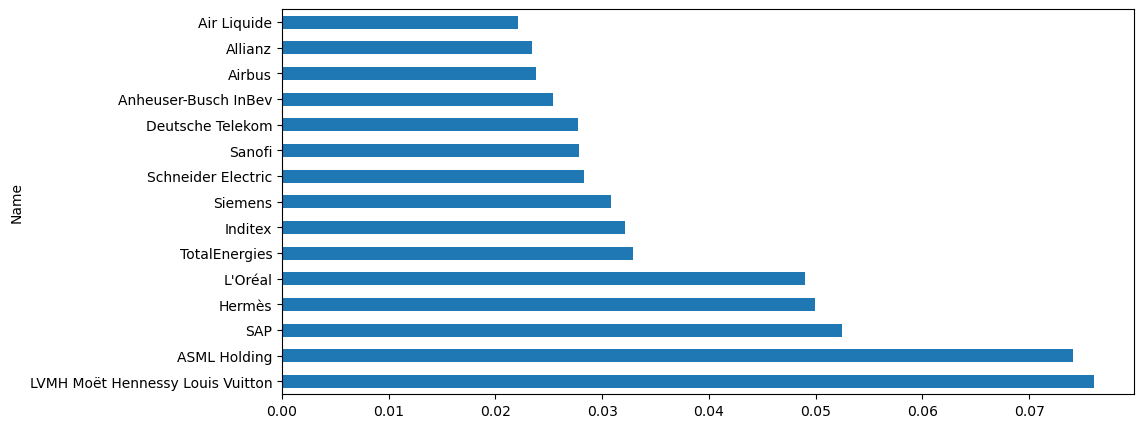

In [65]:
stoxx50.sort_values('WEIGHT', ascending=False).set_index('Name')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

We also observe the participation of companies (market cap) by country and industry:

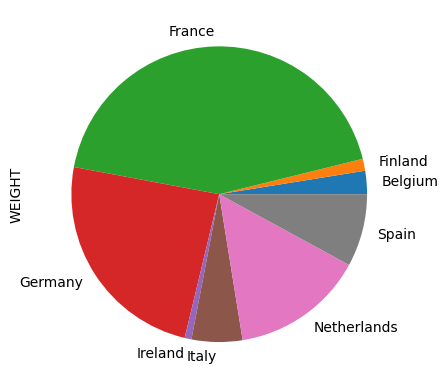

In [87]:
stoxx50.groupby('Registeredoffice')['WEIGHT'].sum().plot.pie()
plt.show()

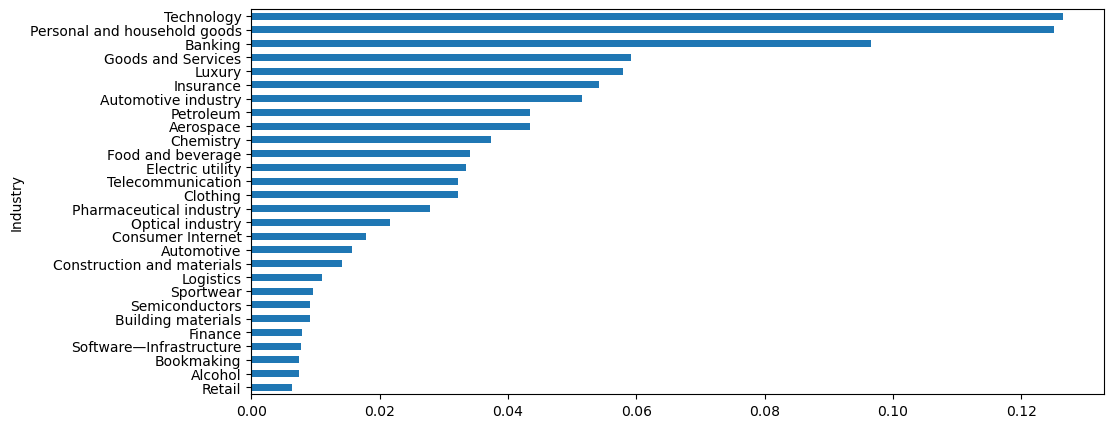

In [88]:
stoxx50.groupby('Industry')['WEIGHT'].sum().sort_values().plot.barh(figsize=(11,5))
plt.show()

🇺🇸 <b>Standard and Poor's 500 (S&P500)</b> tracks the 500 most liquid stocks listed on US exchanges, and represents 80% of the total market capitalization of US public companies a whopping $43 trillion as of start of 2024.

[]

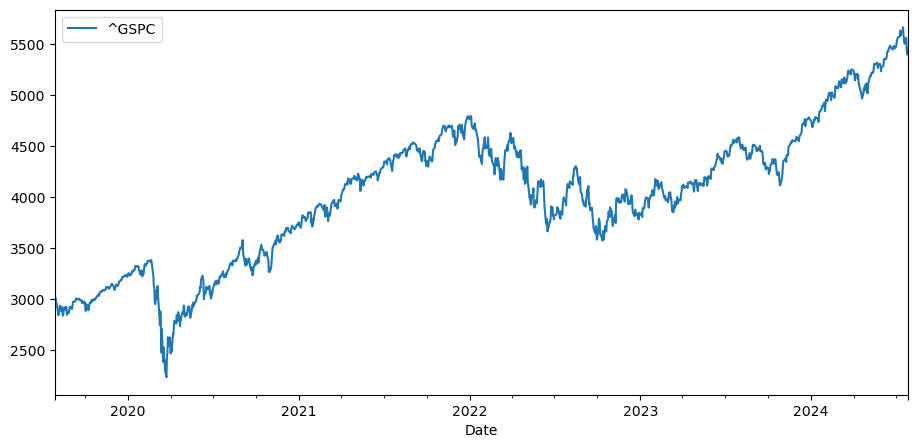

In [90]:
get_yf_ts('^GSPC', '5y', '1d').plot(figsize=(11,5))
plt.plot()

In [91]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [99]:
def try_except_mcap(ticker): #For 500 constituents, more difficult to source every one from Yahoo Finance
    try:
        return get_usd_mcap(ticker)
    except:
        return None

In [100]:
sp500['MARKET_CAP_USD'] = sp500['Symbol'].apply(try_except_mcap)
sp500['WEIGHT'] = sp500['MARKET_CAP_USD'] / sp500['MARKET_CAP_USD'].sum()

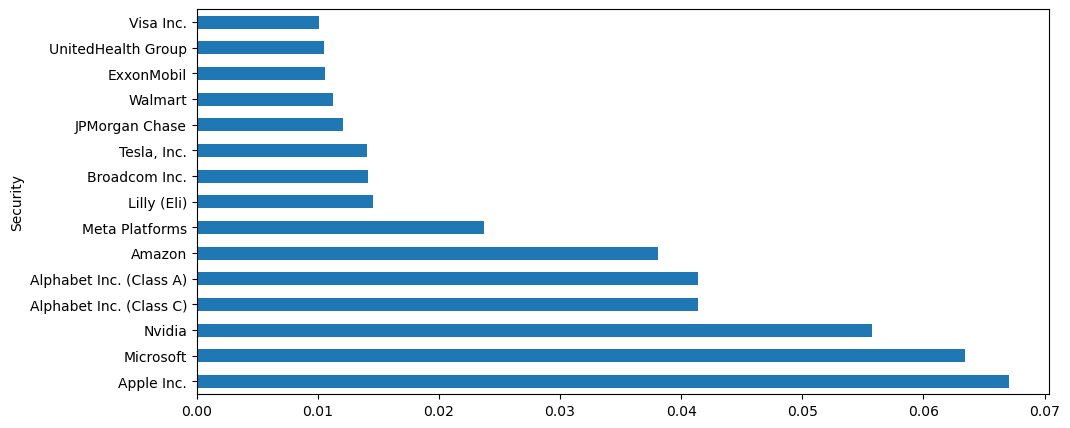

In [129]:
sp500.sort_values('WEIGHT', ascending=False).set_index('Security')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

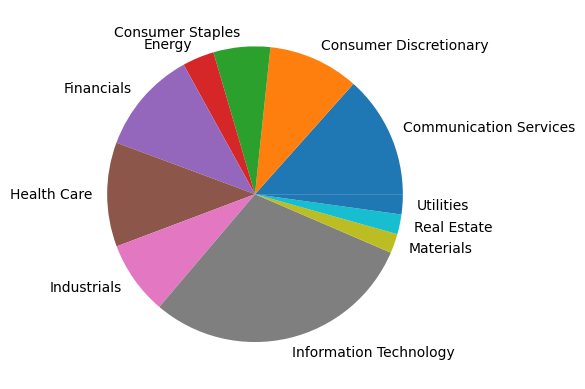

In [134]:
sp500.groupby('GICS Sector')['WEIGHT'].sum().plot.pie(label='')
plt.show()